In [200]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog2.csv')
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,SF,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,PF,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,SG,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,SF,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,PG,20,2.8,3.7,1.5,0.2,10.9


In [201]:
df['Fouls'] = df['PF']
df = df.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df['Pos'])
df1 = pd.concat([df, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,Fouls,C,C-PF,PF,PG,PG-SG,SF,SF-PF,SG,SG-PG
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,1.0,0,0,0,0,0,1,0,0,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,3.3,0,0,1,0,0,0,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.4,0,0,0,0,0,0,0,1,0
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,1.4,0,0,0,0,0,1,0,0,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,2.4,0,0,0,1,0,0,0,0,0


In [202]:
df1['C'] = df1['C'] + df1['C-PF']
df1['PG'] = df1['PG'] + df1['PG-SG']
df1['SF'] = df1['SF'] + df1['SF-PF']
df1['SG'] = df1['SG'] + df1['SG-PG']
df1 = df1.drop(['C-PF','PG-SG','SF-PF','SG-PG'], axis=1)
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PF,PG,SF,SG
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.3,0.2,0.2,1.3,1.0,0,0,0,1,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,0.6,0.4,0.2,6.3,3.3,0,1,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.0,0.1,0.1,2.7,2.4,0,0,0,0,1
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.5,0.7,0.4,7.0,1.4,0,0,0,1,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,3.7,1.5,0.2,10.9,2.4,0,0,1,0,0


In [203]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PF,PG,SF,SG
0,Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.3,0.2,0.2,1.3,1.0,0,0,0,1,0
1,Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,0.6,0.4,0.2,6.3,3.3,0,1,0,0,0
2,James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.0,0.1,0.1,2.7,2.4,0,0,0,0,1
3,Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.5,0.7,0.4,7.0,1.4,0,0,0,1,0
4,Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,3.7,1.5,0.2,10.9,2.4,0,0,1,0,0


In [204]:
#df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,School,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,...,0.3,0.2,0.2,1.3,1.0,0,0,0,1,0
Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,...,0.6,0.4,0.2,6.3,3.3,0,1,0,0,0
James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,...,0.0,0.1,0.1,2.7,2.4,0,0,0,0,1
Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,...,0.5,0.7,0.4,7.0,1.4,0,0,0,1,0
Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,...,3.7,1.5,0.2,10.9,2.4,0,0,1,0,0


In [205]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,School,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,...,0,0,0,1,0,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,...,0,1,0,0,0,5.6,0.6,0.4,0.2,6.3
James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,...,0,0,0,0,1,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,...,0,0,0,1,0,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,...,0,0,1,0,0,2.8,3.7,1.5,0.2,10.9


In [206]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['C', 'PF', 'PG', 'SF', 'SG']
for du in dum:
    cols.remove(du)

In [207]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,School,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-1.408189,-0.955850,-2.020703,-3.646145,-2.497687,-2.461782,-0.151070,-1.970182,-2.108545,-0.023784,...,0,0,0,1,0,-1.106403,-0.666715,-0.712588,-0.163927,-0.958903
Ashraf Amaya,-1.385816,0.910467,1.444038,0.807100,0.681855,0.003288,1.686033,1.392592,0.987808,1.351905,...,0,1,0,0,0,1.942213,-0.429665,-0.166964,-0.163927,0.354995
James Cotton,-1.363444,-2.081130,-1.991341,-2.705589,-2.724797,-2.635379,-0.561297,-2.048386,-2.108545,-0.818195,...,0,0,0,0,1,-0.930521,-0.903765,-0.985400,-0.501126,-0.591011
Eddie Robinson,-1.341072,0.526225,0.122738,0.883880,-1.967763,-1.559081,-1.916829,-1.500958,-1.217813,-2.097005,...,0,0,0,1,0,0.242023,-0.508681,0.651473,0.510471,0.538941
Gilbert Arenas,-1.318699,-0.681392,-1.110475,0.480784,0.908965,0.940708,-0.115398,0.532347,0.521234,0.228103,...,0,0,1,0,0,0.300651,2.019853,2.833971,-0.163927,1.563782


In [209]:
train=df1[0:(round(len(df1)*.8))] 
test=df1[(round(len(df1)*.8 - 1)):]
trains = np.split(train, [33], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [33], axis=1)
test_x=tests[0]
test_y=tests[1]

In [210]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [211]:
train_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Mike Higgins,-1.106403,-0.666715,-0.712588,-0.163927,-0.958903
Ashraf Amaya,1.942213,-0.429665,-0.166964,-0.163927,0.354995
James Cotton,-0.930521,-0.903765,-0.985400,-0.501126,-0.591011
Eddie Robinson,0.242023,-0.508681,0.651473,0.510471,0.538941
Gilbert Arenas,0.300651,2.019853,2.833971,-0.163927,1.563782


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


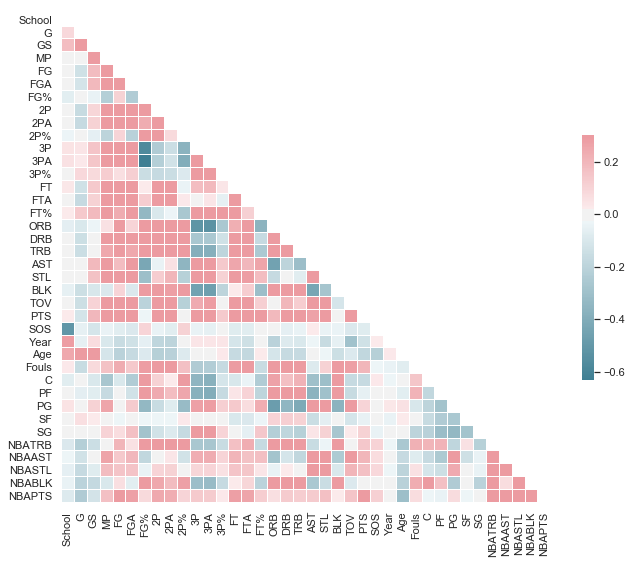

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df1

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [213]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.PredAst.values)

reg.coef_

array([-3.35198484e-02, -6.23422509e-02,  4.95847932e-03, -3.74954177e-01,
       -5.17189946e-01, -2.98683188e+00,  5.33199406e-02,  2.49296060e-01,
        1.59928649e+00, -1.92103167e-01, -5.20544729e-01,  1.88391838e+00,
       -2.99143895e-02, -2.24314591e-01, -2.57817206e-01, -6.63202665e-02,
        2.56631853e-02, -2.40841490e-03,  6.11883295e-02,  2.46539640e-01,
        1.00091413e-01,  6.11325436e-02, -1.17054680e-01,  2.17784343e+00,
        5.82620765e-02,  3.85721283e-02, -2.38794688e-01,  2.77504479e-02,
       -3.38183745e-02, -1.87427692e-01,  1.23664779e-01,  6.02154843e-02,
        3.73658025e-02])

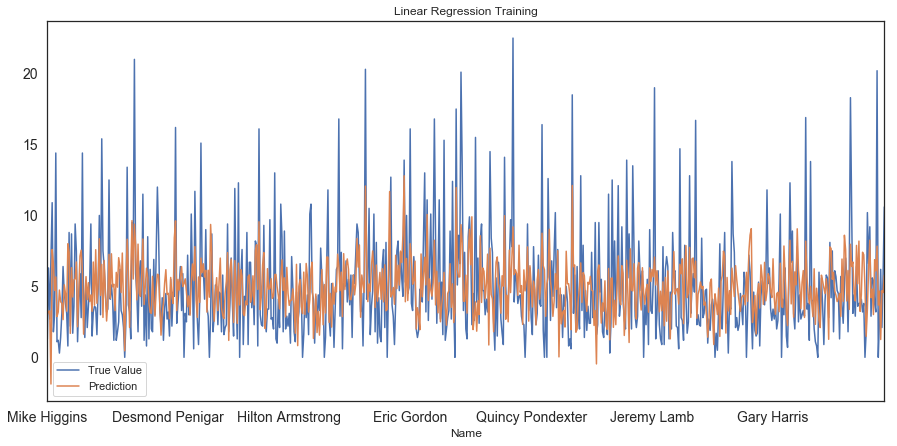

adj train r^2 = 0.21680653330237631
train mse = 10.743886392731472


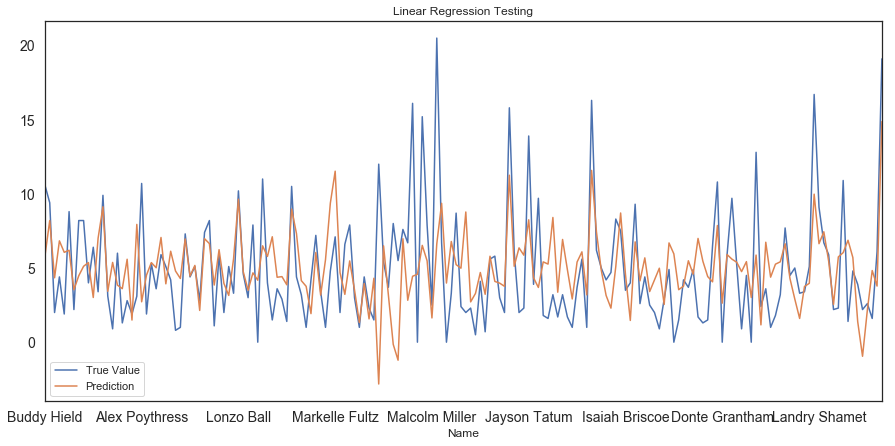

['School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Year', 'Age', 'Fouls', 'C', 'PF', 'PG', 'SF', 'SG']
adj test r^2 = 0.1310667601998582
test mse = 12.315417252864236


In [214]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Extra Trees

In [215]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

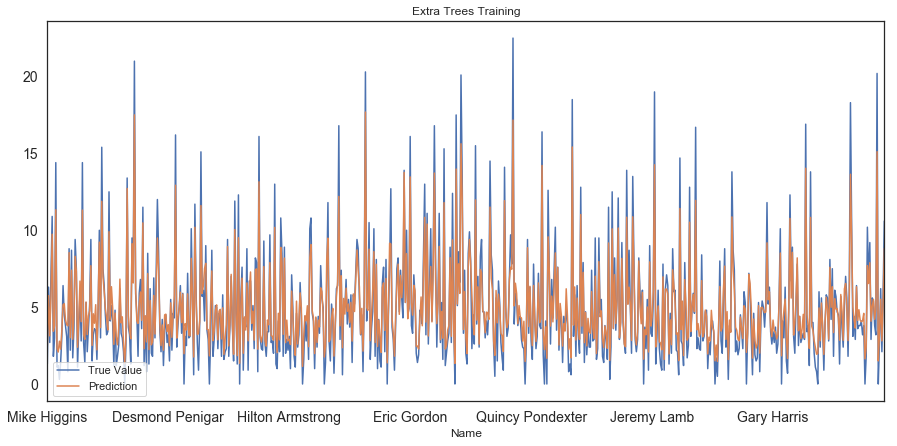

adj train r^2 = 0.8837070766550026
train mse = 1.5953120267532395


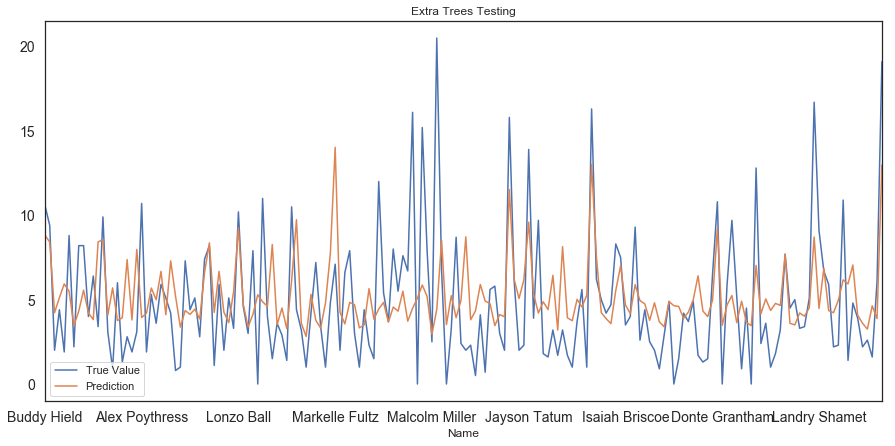

['School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Year', 'Age', 'Fouls', 'C', 'PF', 'PG', 'SF', 'SG']
adj test r^2 = 0.18715788702113856
test mse = 11.520436005344834


In [216]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Random Forrest

In [217]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

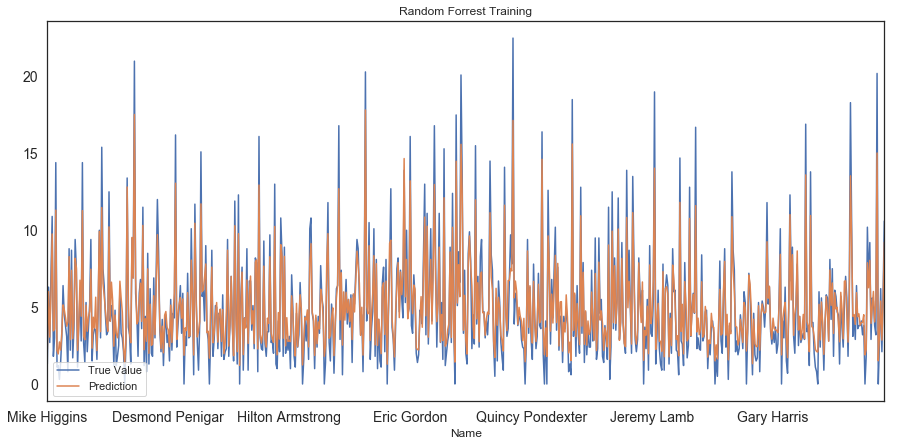

adj train r^2 = 0.8814848972323611
train mse = 1.6257959930735852


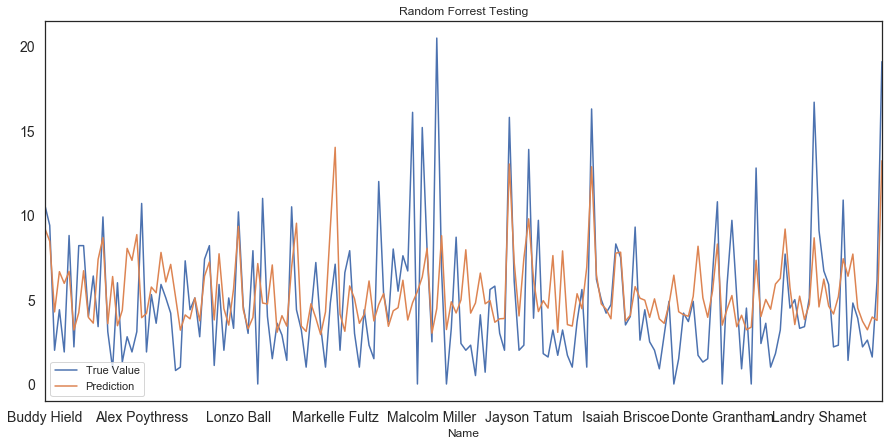

['School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Year', 'Age', 'Fouls', 'C', 'PF', 'PG', 'SF', 'SG']
adj test r^2 = 0.15461818350316936
test mse = 11.981622213620694


In [218]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## XGBoost

In [219]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [220]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.01)
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

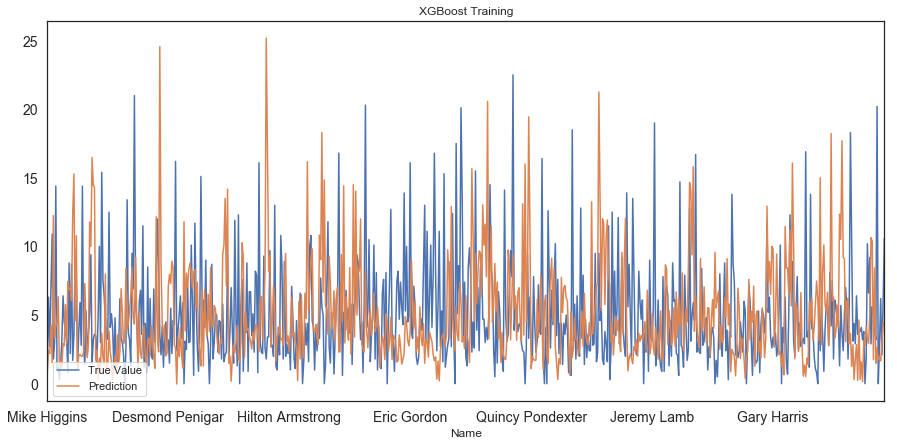

adj train r^2 = -1.0997943086017954
train mse = 28.80508132281419


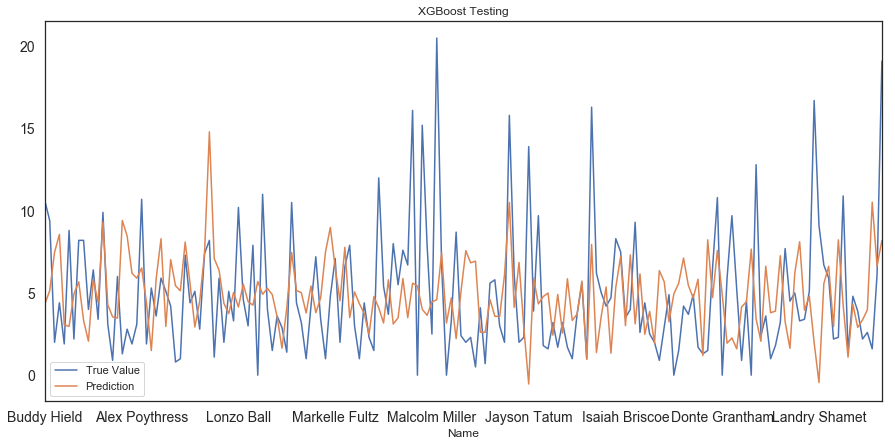

['School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Year', 'Age', 'Fouls', 'C', 'PF', 'PG', 'SF', 'SG']
adj test r^2 = -0.3409860883849618
test mse = 19.005836642347294


In [221]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Feed Forward Neural Network

In [222]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [247]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=33, activation='linear',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.NBAPTS.values.ravel(), validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=1500,verbose=1,shuffle=False)

Train on 693 samples, validate on 174 samples
Epoch 1/1500
693/693 [==============================] - 1s 2ms/step - loss: 22.1915 - val_loss: 18.9752
Epoch 2/1500
693/693 [==============================] - 0s 125us/step - loss: 16.6881 - val_loss: 14.1629
Epoch 3/1500
693/693 [==============================] - 0s 118us/step - loss: 12.3648 - val_loss: 10.4817
Epoch 4/1500
693/693 [==============================] - 0s 127us/step - loss: 9.1143 - val_loss: 7.7119
Epoch 5/1500
693/693 [==============================] - 0s 130us/step - loss: 6.7444 - val_loss: 5.7082
Epoch 6/1500
693/693 [==============================] - 0s 123us/step - loss: 5.0115 - val_loss: 4.2565
Epoch 7/1500
693/693 [==============================] - 0s 106us/step - loss: 3.7627 - val_loss: 3.2364
Epoch 8/1500
693/693 [==============================] - 0s 115us/step - loss: 2.8984 - val_loss: 2.5134
Epoch 9/1500
693/693 [==============================] - 0s 120us/step - loss: 2.2829 - val_loss: 2.0213
Epoch 10/1500


693/693 [==============================] - 0s 107us/step - loss: 0.8884 - val_loss: 0.8339
Epoch 79/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8822 - val_loss: 0.8326
Epoch 80/1500
693/693 [==============================] - 0s 166us/step - loss: 0.8830 - val_loss: 0.8353
Epoch 81/1500
693/693 [==============================] - 0s 205us/step - loss: 0.8829 - val_loss: 0.8351
Epoch 82/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8877 - val_loss: 0.8367
Epoch 83/1500
693/693 [==============================] - 0s 106us/step - loss: 0.8961 - val_loss: 0.8350
Epoch 84/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8905 - val_loss: 0.8333
Epoch 85/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8935 - val_loss: 0.8337
Epoch 86/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8966 - val_loss: 0.8364
Epoch 87/1500
693/693 [==============================] - 0s 103us/ste

693/693 [==============================] - 0s 107us/step - loss: 0.8554 - val_loss: 0.8239
Epoch 156/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8477 - val_loss: 0.8263
Epoch 157/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8466 - val_loss: 0.8239
Epoch 158/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8518 - val_loss: 0.8244
Epoch 159/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8502 - val_loss: 0.8214
Epoch 160/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8536 - val_loss: 0.8218
Epoch 161/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8510 - val_loss: 0.8249
Epoch 162/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8555 - val_loss: 0.8242
Epoch 163/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8498 - val_loss: 0.8206
Epoch 164/1500
693/693 [==============================] - 0s 

693/693 [==============================] - 0s 256us/step - loss: 0.8381 - val_loss: 0.8217
Epoch 233/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8362 - val_loss: 0.8169
Epoch 234/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8271 - val_loss: 0.8181
Epoch 235/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8377 - val_loss: 0.8228
Epoch 236/1500
693/693 [==============================] - 0s 107us/step - loss: 0.8450 - val_loss: 0.8221
Epoch 237/1500
693/693 [==============================] - 0s 102us/step - loss: 0.8338 - val_loss: 0.8242
Epoch 238/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8380 - val_loss: 0.8219
Epoch 239/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8333 - val_loss: 0.8228
Epoch 240/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8366 - val_loss: 0.8171
Epoch 241/1500
693/693 [==============================] - 0s 

693/693 [==============================] - 0s 106us/step - loss: 0.8194 - val_loss: 0.8182
Epoch 310/1500
693/693 [==============================] - 0s 102us/step - loss: 0.8194 - val_loss: 0.8197
Epoch 311/1500
693/693 [==============================] - 0s 106us/step - loss: 0.8260 - val_loss: 0.8221
Epoch 312/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8327 - val_loss: 0.8166
Epoch 313/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8192 - val_loss: 0.8205
Epoch 314/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8248 - val_loss: 0.8198
Epoch 315/1500
693/693 [==============================] - 0s 106us/step - loss: 0.8227 - val_loss: 0.8242
Epoch 316/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8229 - val_loss: 0.8201
Epoch 317/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8457 - val_loss: 0.8271
Epoch 318/1500
693/693 [==============================] - 0s 

693/693 [==============================] - 0s 105us/step - loss: 0.8057 - val_loss: 0.8300
Epoch 387/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8165 - val_loss: 0.8304
Epoch 388/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8140 - val_loss: 0.8216
Epoch 389/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8189 - val_loss: 0.8202
Epoch 390/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8206 - val_loss: 0.8260
Epoch 391/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8134 - val_loss: 0.8177
Epoch 392/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8189 - val_loss: 0.8235
Epoch 393/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8184 - val_loss: 0.8143
Epoch 394/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8174 - val_loss: 0.8192
Epoch 395/1500
693/693 [==============================] - 0s 

693/693 [==============================] - 0s 106us/step - loss: 0.8404 - val_loss: 0.8155
Epoch 464/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8518 - val_loss: 0.8207
Epoch 465/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8341 - val_loss: 0.8234
Epoch 466/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8329 - val_loss: 0.8153
Epoch 467/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8309 - val_loss: 0.8155
Epoch 468/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8139 - val_loss: 0.8219
Epoch 469/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8054 - val_loss: 0.8219
Epoch 470/1500
693/693 [==============================] - 0s 106us/step - loss: 0.8051 - val_loss: 0.8230
Epoch 471/1500
693/693 [==============================] - 0s 230us/step - loss: 0.7990 - val_loss: 0.8302
Epoch 472/1500
693/693 [==============================] - 0s 

693/693 [==============================] - 0s 107us/step - loss: 0.7955 - val_loss: 0.8225
Epoch 541/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8047 - val_loss: 0.8190
Epoch 542/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8150 - val_loss: 0.8240
Epoch 543/1500
693/693 [==============================] - 0s 104us/step - loss: 0.7971 - val_loss: 0.8183
Epoch 544/1500
693/693 [==============================] - 0s 103us/step - loss: 0.7990 - val_loss: 0.8228
Epoch 545/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8051 - val_loss: 0.8220
Epoch 546/1500
693/693 [==============================] - 0s 103us/step - loss: 0.7983 - val_loss: 0.8262
Epoch 547/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8083 - val_loss: 0.8217
Epoch 548/1500
693/693 [==============================] - 0s 104us/step - loss: 0.7968 - val_loss: 0.8199
Epoch 549/1500
693/693 [==============================] - 0s 

693/693 [==============================] - 0s 106us/step - loss: 0.8095 - val_loss: 0.8124
Epoch 618/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8222 - val_loss: 0.8180
Epoch 619/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8229 - val_loss: 0.8083
Epoch 620/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8232 - val_loss: 0.8073
Epoch 621/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8428 - val_loss: 0.8083
Epoch 622/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8410 - val_loss: 0.8092
Epoch 623/1500
693/693 [==============================] - 0s 190us/step - loss: 0.8419 - val_loss: 0.8079
Epoch 624/1500
693/693 [==============================] - 0s 191us/step - loss: 0.8325 - val_loss: 0.8124
Epoch 625/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8434 - val_loss: 0.8148
Epoch 626/1500
693/693 [==============================] - 0s 

693/693 [==============================] - 0s 105us/step - loss: 0.7924 - val_loss: 0.8134
Epoch 695/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8009 - val_loss: 0.8134
Epoch 696/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8137 - val_loss: 0.8196
Epoch 697/1500
693/693 [==============================] - 0s 106us/step - loss: 0.8081 - val_loss: 0.8202
Epoch 698/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8023 - val_loss: 0.8182
Epoch 699/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8096 - val_loss: 0.8219
Epoch 700/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8121 - val_loss: 0.8161
Epoch 701/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8174 - val_loss: 0.8161
Epoch 702/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8074 - val_loss: 0.8237
Epoch 703/1500
693/693 [==============================] - 0s 

693/693 [==============================] - 0s 102us/step - loss: 0.7971 - val_loss: 0.8195
Epoch 772/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8112 - val_loss: 0.8239
Epoch 773/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8004 - val_loss: 0.8196
Epoch 774/1500
693/693 [==============================] - 0s 114us/step - loss: 0.8254 - val_loss: 0.8256
Epoch 775/1500
693/693 [==============================] - 0s 102us/step - loss: 0.8152 - val_loss: 0.8193
Epoch 776/1500
693/693 [==============================] - 0s 199us/step - loss: 0.8299 - val_loss: 0.8200
Epoch 777/1500
693/693 [==============================] - 0s 186us/step - loss: 0.8275 - val_loss: 0.8237
Epoch 778/1500
693/693 [==============================] - 0s 113us/step - loss: 0.8472 - val_loss: 0.8236
Epoch 779/1500
693/693 [==============================] - 0s 101us/step - loss: 0.8477 - val_loss: 0.8158
Epoch 780/1500
693/693 [==============================] - 0s 1

693/693 [==============================] - 0s 102us/step - loss: 0.8353 - val_loss: 0.8012
Epoch 849/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8340 - val_loss: 0.8101
Epoch 850/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8332 - val_loss: 0.8177
Epoch 851/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8153 - val_loss: 0.8196
Epoch 852/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8189 - val_loss: 0.8207
Epoch 853/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8164 - val_loss: 0.8189
Epoch 854/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8084 - val_loss: 0.8202
Epoch 855/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8092 - val_loss: 0.8174
Epoch 856/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8078 - val_loss: 0.8164
Epoch 857/1500
693/693 [==============================] - 0s 99u

693/693 [==============================] - 0s 103us/step - loss: 0.8275 - val_loss: 0.8103
Epoch 926/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8077 - val_loss: 0.8170
Epoch 927/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8200 - val_loss: 0.8109
Epoch 928/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8277 - val_loss: 0.8139
Epoch 929/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8109 - val_loss: 0.8190
Epoch 930/1500
693/693 [==============================] - 0s 98us/step - loss: 0.8162 - val_loss: 0.8258
Epoch 931/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8023 - val_loss: 0.8125
Epoch 932/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8026 - val_loss: 0.8186
Epoch 933/1500
693/693 [==============================] - 0s 99us/step - loss: 0.7884 - val_loss: 0.8220
Epoch 934/1500
693/693 [==============================] - 0s 253u

693/693 [==============================] - 0s 277us/step - loss: 0.8280 - val_loss: 0.8175
Epoch 1003/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8319 - val_loss: 0.8135
Epoch 1004/1500
693/693 [==============================] - 0s 106us/step - loss: 0.8460 - val_loss: 0.8130
Epoch 1005/1500
693/693 [==============================] - 0s 104us/step - loss: 0.8532 - val_loss: 0.8064
Epoch 1006/1500
693/693 [==============================] - 0s 103us/step - loss: 0.8643 - val_loss: 0.8069
Epoch 1007/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8688 - val_loss: 0.8045
Epoch 1008/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8484 - val_loss: 0.8048
Epoch 1009/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8331 - val_loss: 0.8135
Epoch 1010/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8157 - val_loss: 0.8131
Epoch 1011/1500
693/693 [=============================

693/693 [==============================] - 0s 102us/step - loss: 0.7792 - val_loss: 0.8206
Epoch 1079/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7847 - val_loss: 0.8186
Epoch 1080/1500
693/693 [==============================] - 0s 99us/step - loss: 0.7905 - val_loss: 0.8268
Epoch 1081/1500
693/693 [==============================] - 0s 99us/step - loss: 0.7952 - val_loss: 0.8225
Epoch 1082/1500
693/693 [==============================] - 0s 101us/step - loss: 0.7687 - val_loss: 0.8230
Epoch 1083/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8012 - val_loss: 0.8267
Epoch 1084/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7818 - val_loss: 0.8156
Epoch 1085/1500
693/693 [==============================] - 0s 101us/step - loss: 0.7941 - val_loss: 0.8194
Epoch 1086/1500
693/693 [==============================] - 0s 102us/step - loss: 0.7874 - val_loss: 0.8145
Epoch 1087/1500
693/693 [==============================

693/693 [==============================] - 0s 102us/step - loss: 0.7914 - val_loss: 0.8170
Epoch 1155/1500
693/693 [==============================] - 0s 99us/step - loss: 0.7707 - val_loss: 0.8208
Epoch 1156/1500
693/693 [==============================] - 0s 101us/step - loss: 0.7860 - val_loss: 0.8168
Epoch 1157/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7854 - val_loss: 0.8207
Epoch 1158/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7790 - val_loss: 0.8177
Epoch 1159/1500
693/693 [==============================] - 0s 240us/step - loss: 0.7899 - val_loss: 0.8216
Epoch 1160/1500
693/693 [==============================] - 0s 104us/step - loss: 0.7817 - val_loss: 0.8168
Epoch 1161/1500
693/693 [==============================] - 0s 105us/step - loss: 0.7791 - val_loss: 0.8199
Epoch 1162/1500
693/693 [==============================] - 0s 105us/step - loss: 0.8034 - val_loss: 0.8232
Epoch 1163/1500
693/693 [=============================

693/693 [==============================] - 0s 103us/step - loss: 0.7773 - val_loss: 0.8137
Epoch 1231/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7895 - val_loss: 0.8207
Epoch 1232/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7946 - val_loss: 0.8133
Epoch 1233/1500
693/693 [==============================] - 0s 99us/step - loss: 0.7988 - val_loss: 0.8210
Epoch 1234/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8136 - val_loss: 0.8236
Epoch 1235/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8138 - val_loss: 0.8219
Epoch 1236/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8170 - val_loss: 0.8198
Epoch 1237/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8137 - val_loss: 0.8208
Epoch 1238/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8271 - val_loss: 0.8094
Epoch 1239/1500
693/693 [==============================]

693/693 [==============================] - 0s 102us/step - loss: 0.7986 - val_loss: 0.8137
Epoch 1307/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7825 - val_loss: 0.8122
Epoch 1308/1500
693/693 [==============================] - 0s 99us/step - loss: 0.7959 - val_loss: 0.8204
Epoch 1309/1500
693/693 [==============================] - 0s 99us/step - loss: 0.7819 - val_loss: 0.8170
Epoch 1310/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7843 - val_loss: 0.8096
Epoch 1311/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8105 - val_loss: 0.8178
Epoch 1312/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8014 - val_loss: 0.8106
Epoch 1313/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7781 - val_loss: 0.8099
Epoch 1314/1500
693/693 [==============================] - 0s 99us/step - loss: 0.7930 - val_loss: 0.8153
Epoch 1315/1500
693/693 [==============================] 

Epoch 1383/1500
693/693 [==============================] - 0s 217us/step - loss: 0.8325 - val_loss: 0.8314
Epoch 1384/1500
693/693 [==============================] - 0s 137us/step - loss: 0.7875 - val_loss: 0.8279
Epoch 1385/1500
693/693 [==============================] - 0s 104us/step - loss: 0.7964 - val_loss: 0.8280
Epoch 1386/1500
693/693 [==============================] - 0s 104us/step - loss: 0.7870 - val_loss: 0.8150
Epoch 1387/1500
693/693 [==============================] - 0s 102us/step - loss: 0.7798 - val_loss: 0.8193
Epoch 1388/1500
693/693 [==============================] - 0s 101us/step - loss: 0.7909 - val_loss: 0.8176
Epoch 1389/1500
693/693 [==============================] - 0s 101us/step - loss: 0.7909 - val_loss: 0.8162
Epoch 1390/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7721 - val_loss: 0.8086
Epoch 1391/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7782 - val_loss: 0.8101
Epoch 1392/1500
693/693 [============

693/693 [==============================] - 0s 101us/step - loss: 0.8232 - val_loss: 0.8139
Epoch 1460/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8300 - val_loss: 0.8240
Epoch 1461/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8239 - val_loss: 0.8234
Epoch 1462/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8184 - val_loss: 0.8293
Epoch 1463/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8249 - val_loss: 0.8168
Epoch 1464/1500
693/693 [==============================] - 0s 100us/step - loss: 0.8032 - val_loss: 0.8138
Epoch 1465/1500
693/693 [==============================] - 0s 99us/step - loss: 0.8025 - val_loss: 0.8273
Epoch 1466/1500
693/693 [==============================] - 0s 101us/step - loss: 0.7922 - val_loss: 0.8216
Epoch 1467/1500
693/693 [==============================] - 0s 100us/step - loss: 0.7951 - val_loss: 0.8220
Epoch 1468/1500
693/693 [==============================

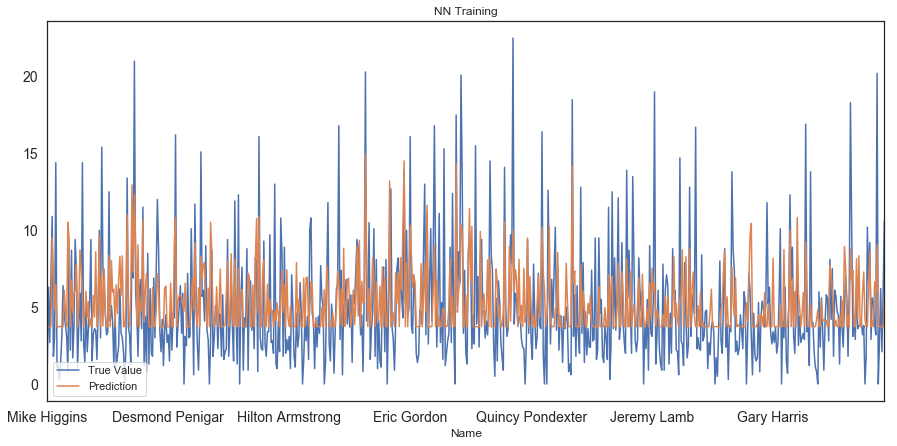

adj train r^2 = 0.24679290757690897
train mse = 10.332531839566016


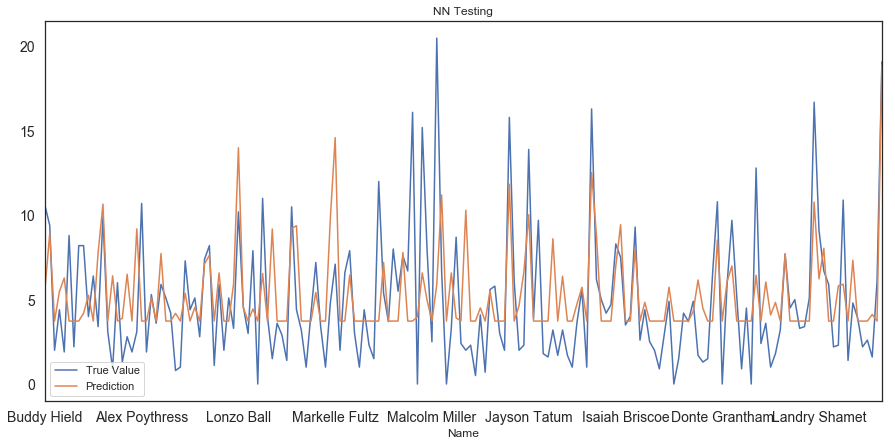

adj test r^2 = 0.23958039225330185
test mse = 10.777450243259082


In [248]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## LSTM

In [230]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [235]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=40, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 693 samples, validate on 174 samples
Epoch 1/40
693/693 [==============================] - 9s 13ms/step - loss: 0.8891 - val_loss: 0.8580
Epoch 2/40
693/693 [==============================] - 4s 6ms/step - loss: 0.7634 - val_loss: 0.9897
Epoch 3/40
693/693 [==============================] - 4s 6ms/step - loss: 0.6985 - val_loss: 0.9347
Epoch 4/40
693/693 [==============================] - 5s 7ms/step - loss: 0.6088 - val_loss: 0.9587
Epoch 5/40
693/693 [==============================] - 5s 7ms/step - loss: 0.5575 - val_loss: 1.3655
Epoch 6/40
693/693 [==============================] - 4s 6ms/step - loss: 0.5057 - val_loss: 2.0073
Epoch 7/40
693/693 [==============================] - 5s 7ms/step - loss: 0.4619 - val_loss: 1.7670
Epoch 8/40
693/693 [==============================] - 5s 7ms/step - loss: 0.4562 - val_loss: 1.2777
Epoch 9/40
693/693 [==============================] - 4s 6ms/step - loss: 0.4214 - val_loss: 1.2702
Epoch 10/40
693/693 [==============================] 

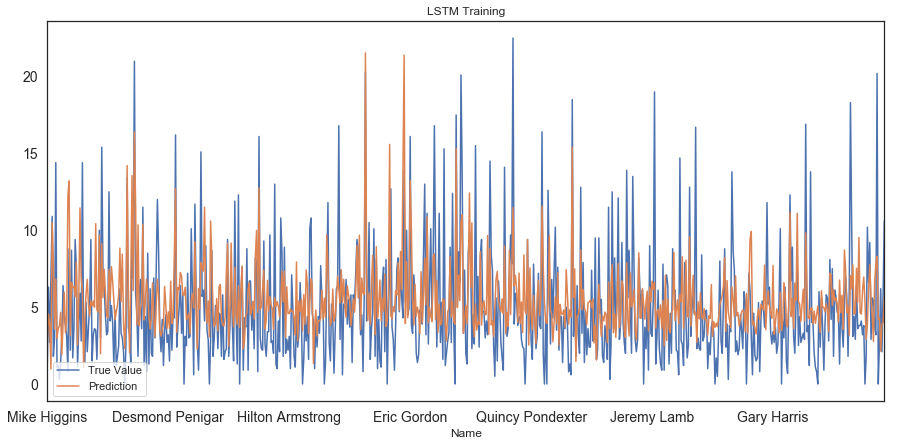

adj train r^2 = 0.22424915104692134
train mse = 10.641788197442528


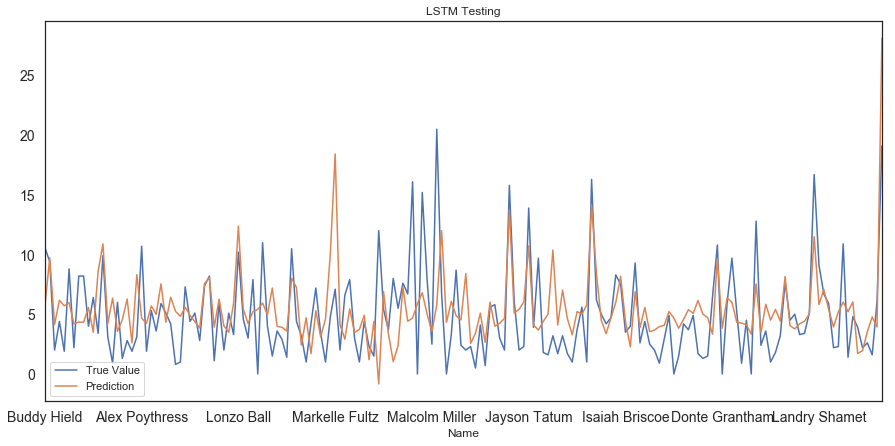

adj test r^2 = 0.12329259881519228
test mse = 12.425600678768493


In [236]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## TPOT

In [237]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=2, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


2.0019906166666668 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LinearSVR(SelectPercentile(CombineDFs(CombineDFs(CombineDFs(input_matrix, CombineDFs(input_matrix, CombineDFs(StandardScaler(CombineDFs(CombineDFs(input_matrix, CombineDFs(input_matrix, MinMaxScaler(input_matrix))), input_matrix)), input_matrix))), CombineDFs(input_matrix, CombineDFs(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), input_matrix))), SelectPercentile(CombineDFs(input_matrix, input_matrix), percentile=45)), percentile=36), C=0.001, dual=False, epsilon=0.0001, loss=squared_epsilon_insensitive, tol=0.001)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validat

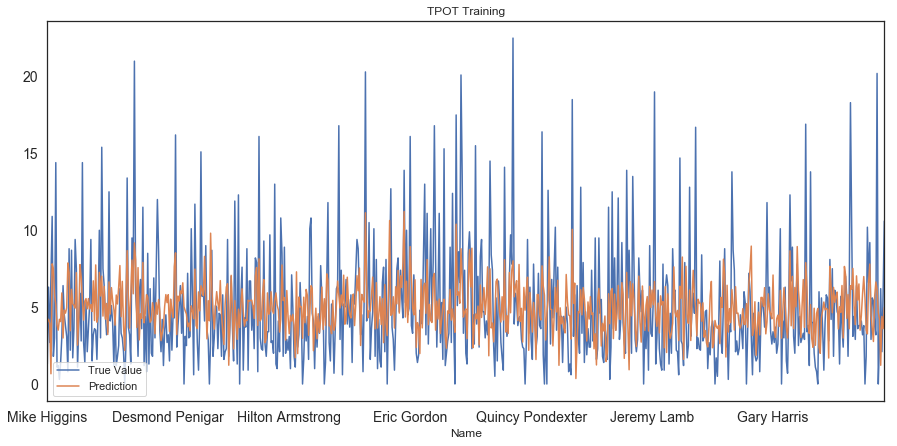

adj train r^2 = 0.1720727079614861
train mse = 11.35754720300528


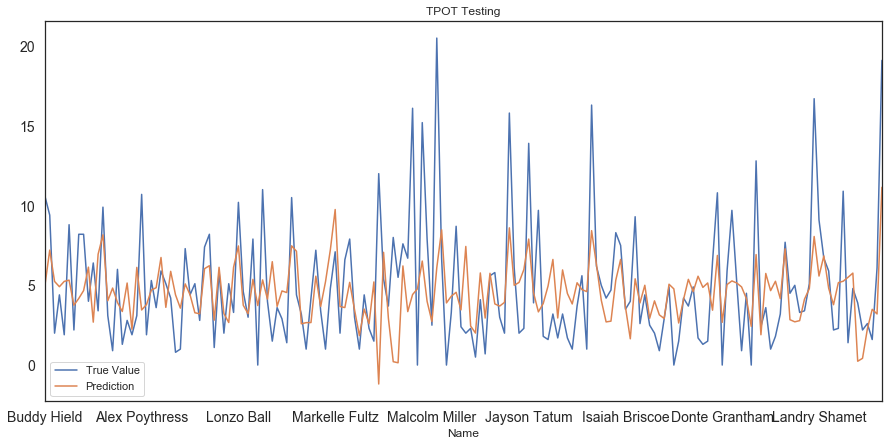

adj test r^2 = 0.15178090314172765
test mse = 12.021835074533401


In [238]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [249]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Justin Patton,-1.340912,-0.903765,1.469910,-0.838324,2.0,10.296965,-8.296965
Thomas Bryant,-0.696012,-0.587698,-0.985400,-0.501126,1.5,9.184807,-7.684807
Markelle Fultz,0.476532,2.098870,1.197098,0.173272,7.1,14.602570,-7.502570
Jakob Poeltl,0.476532,-0.745732,-0.439776,0.510471,3.1,9.191592,-6.091592
Georges Niang,-0.930521,-0.745732,-0.985400,-0.838324,0.9,6.407127,-5.507127


In [250]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Donovan Mitchell,0.828296,2.019853,2.833971,0.173272,20.5,5.893533,14.606467
Kyle Kuzma,2.352604,0.518536,0.378661,0.510471,16.1,3.729967,12.370033
Lauri Markkanen,3.056131,0.044435,0.378661,1.184868,15.2,6.584304,8.615696
Andre Ingram,0.417905,1.861820,2.833971,4.219657,12.0,3.729967,8.270033
Alex Poythress,1.473195,-0.271631,0.105849,0.173272,10.7,3.729967,6.970033
